# JOBS DATABASE

## ABSTRACT

The objective of this project is to build a job database by scrapping Glassdoor using python and calling for Social Media details using Twitter API. Database was successfully created in PostgreSQL. This project is focused on job domains such as supply chain analyst, data analyst and business analyst. Job listing and the respective details have been scrapped for 300 companies collectively. And twitter specific details have been called for the 300 companies into the database.

### Importing the Libraries

To Automate the scraping from Glassdoor for mutiple pages, Selenium library was used. To avoid exception errors, the below listed exceptions were imported from the selenium library. 

Geckodriver was used to access the Firefox web brower to scrape the data.

In [1]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException, StaleElementReferenceException
from selenium import webdriver
import time
import csv
import pandas as pd


The jobs details were scrapped for 3 different roles (Data Analyst, Business Analyst and Supply Chain Analyst). The URL for each of the analyst roles were manually changed to obtain the data.

In [137]:
jobs = [] # An empty list was created to append the scrapped details
for i in range(1,7):
    url = "https://www.glassdoor.com/Job/us-supply-chain-analyst-jobs-SRCH_IL.0,2_IN1_KO3,23_IP"+ str(i) +".htm"
    #url = "https://www.glassdoor.com/Job/us-data-analyst-jobs-SRCH_IL.0,2_IN1_KO3,15_IP"+ str(i) +".htm"
    #url = "https://www.glassdoor.com/Job/us-business-analyst-jobs-SRCH_IL.0,2_IN1_KO3,19_IP"+ str(i) +".htm"
    
    driver = webdriver.Firefox()
    driver.get(url)
    # The sleep time has been given at various instances all through
    time.sleep(3)
    # Random click on the page to make the login menu pop up
    try:
        driver.find_element_by_class_name("selected").click()
    except ElementClickInterceptedException:
        pass

    time.sleep(3)
    
    #Using the follwoing xpath to automate the login whenever the page asks for it
    try:
        driver.find_element_by_xpath('.//span[@class="SVGInline modal_closeIcon"]').click()
    except NoSuchElementException:
        pass

    job_buttons = driver.find_elements_by_class_name("jl")
    #Toggleing through each job posting one after the other to fetch the required details
    for i in job_buttons:
        i.click()
        
        try:
            company_name = driver.find_element_by_xpath('.//div[@class="employerName"]').text
        except StaleElementReferenceException:
            company_name = driver.find_element_by_xpath('.//div[@class="employerName"]').text
        except NoSuchElementException:
            company_name = -1
        time.sleep(0.5)
        try:    
            location = driver.find_element_by_xpath('.//div[@class="location"]').text
        except StaleElementReferenceException:
            location = driver.find_element_by_xpath('.//div[@class="location"]').text
        except NoSuchElementException:
            location = -1
        time.sleep(0.5)   
        try:    
            job_title = driver.find_element_by_xpath('.//div[contains(@class, "title")]').text
        except StaleElementReferenceException:
            job_title = driver.find_element_by_xpath('.//div[contains(@class, "title")]').text
        except NoSuchElementException:
            job_title = -1
        time.sleep(0.5)
        try:
            job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
        except StaleElementReferenceException:
            job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
        except NoSuchElementException:
            job_description = -1
        time.sleep(0.5)         
                
        try:
            ratings = driver.find_element_by_xpath('.//div[@class = "employerName"]/span[@class="rating"]').text
        except NoSuchElementException:
            ratings = -1
        except StaleElementReferenceException:
            ratings = driver.find_element_by_xpath('.//div[@class = "employerName"]/span[@class="rating"]').text
        time.sleep(1)  
        try:
            driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="overview"]').click()
            time.sleep(0.5)
            try:
                headquarters = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Headquarters"]//following-sibling::*').text
            except NoSuchElementException:
                headquarters = -1
            time.sleep(0.5)
            try:
                size = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Size"]//following-sibling::*').text
            except NoSuchElementException:
                size = -1
            time.sleep(0.5)
            try:
                type_of_ownership = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Type"]//following-sibling::*').text
            except NoSuchElementException:
                type_of_ownership = -1
            time.sleep(0.5)
            try:
                industry = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Industry"]//following-sibling::*').text
            except NoSuchElementException:
                industry = -1
            time.sleep(0.5)
            try:
                company = driver.find_element_by_xpath('.//div[@class="noMarg padTopSm padBot"]/span[@class="value website"]/a')
                company_url = company.get_attribute('href')
            except NoSuchElementException:
                company_url = -1
            except StaleElementReferenceException:
                company = driver.find_element_by_xpath('.//div[@class="noMarg padTopSm padBot"]/span[@class="value website"]/a')
                company_url = company.get_attribute('href')
                
                
        except NoSuchElementException:
            headquarters = -1
            size = -1
            type_of_ownership = -1
            industry = -1
            competitors = -1
            company_url = -1
        except ElementClickInterceptedException:
            pass
        
        time.sleep(0.5)
        #Toggeling to the Ratings table of the particular job and scrapping the details
        try:
            driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="rating"]').click()
            time.sleep(1)
            
            try:
                comp_benefits = driver.find_element_by_xpath('//*[@id="RatingsTrends"]/div[1]/ul/li[1]/span[2]/span').text
            except NoSuchElementException:
                comp_benefits = -1
            time.sleep(0.5)
            
            
            try:
                culture_values = driver.find_element_by_xpath('//*[@id="RatingsTrends"]/div[1]/ul/li[2]/span[2]/span').text
            except NoSuchElementException:
                culture_values = -1
            time.sleep(0.5)
            
            
            try:
                career_opp = driver.find_element_by_xpath('//*[@id="RatingsTrends"]/div[1]/ul/li[3]/span[2]/span').text
            except NoSuchElementException:
                career_opp = -1
            time.sleep(0.5)
            
            
            try:
                worklife_balance = driver.find_element_by_xpath('//*[@id="RatingsTrends"]/div[1]/ul/li[4]/span[2]/span').text
            except NoSuchElementException:
                worklife_balance = -1
            time.sleep(0.5)
            
            try:
                senior_management = driver.find_element_by_xpath('//*[@id="RatingsTrends"]/div[1]/ul/li[5]/span[2]/span').text
            except NoSuchElementException:
                senior_management = -1
            time.sleep(0.5)
        
        except NoSuchElementException:
            overall = -1
            comp_benefits = -1
            culture_values = -1
            career_opp = -1
            worklife_balance = -1
            senior_management = -1
        #Below is the script to toggle to the reviews tab of the particular job and scrapping the data    
        try:
            driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="reviews"]').click()
            time.sleep(1)

            reviews = driver.find_elements_by_xpath('.//div[@class="reviews-feed-ajax"]/ol')
            #print(reviews)
            #print()
            time.sleep(3)
            for j in reviews:
                try:
                    summary = driver.find_element_by_xpath('.//div[@class="companyTitle"]/h2/span').text
                    reviewer_status = driver.find_element_by_xpath('.//div[@class="reviewerStatus"]').text
                    pros = driver.find_element_by_xpath('.//div[@class="cell top"]/p[@class=" pros mainText"]').text
                    cons = driver.find_element_by_xpath('.//div[@class="cell top"]/p[@class=" cons mainText"]').text
                    Date = driver.find_element_by_xpath('.//div[@class="dateTime"]/time').text
                    
                except NoSuchElementException:
                    summary = -1
                    company_name = -1
                    job_title = -1
                    reviewer_status = -1
                    pros = -1
                    cons = -1
                    Date = -1
                    
            
        jobs.append({"Job Title" : job_title,
                "Job Description" : job_description,
                "Rating" : ratings,
                "Company Name" : company_name,
                "Location" : location,
                "Headquarters" : headquarters,
                "Size" : size,
                "Type of ownership" : type_of_ownership,
                "Company URL" : company_url,
                "Industry" : industry,
                "Comp & benefits Rating" : comp_benefits,
                "Culture & values Rating" : culture_values,
                "Career opportunities Rating" : career_opp,
                "Work/Life balance Rating" : worklife_balance,
                "Senior Management Rating" : senior_management,
                "Summary" : summary,
                "Reviewer Status" : reviewer_status,
                "Pros" : pros,
                "Cons" : cons,
                "Date" : Date,})
 #Appending all the scrapped data into "jobs" dataframe and writing it into a CSV file
  


#### Data which has been obtained by web scrapping has been attached in a CSV file to the GitHub link 

In [138]:
table = pd.DataFrame(jobs)
table.to_csv('glassdoor_Supply_chain_Analyst.csv', index = False)
#table.to_csv('glassdoor_data_Analyst.csv', index = False)
#table.to_csv('glassdoor_business_Analyst.csv', index = False)

In [ ]:
import twitter

CONSUMER_KEY = 'auTIVP4hHiJA7Snb4XYWWEofR'
CONSUMER_SECRET = 'VeoKqZ1twMgYaxTSNB6MRO6dvg112BYuTajEZJMw8gzutjpDKR'
OAUTH_TOKEN = '1121864797-GyTUHsApFDjZGoP4ovCDXudSq48wXUXGiBwVczo'
OAUTH_TOKEN_SECRET = 'I5FK5vwn70xskQTgHema1VzAZLoHZIR1NDlTXHfvuTSVS'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)
#print(twitter_api)
supply_chain_analyst = [ "@InsightEnt", "@coop_finance", "@rayconglobal", "@uline", "@SuccessCharters", "@CAP_slo", 
                        "@BeazleyGroup", "@CLAviationGroup", "@genscoinc", "@CenlarFSB", "@BridgerockData", "@Comscore", 
                        "@airgas", "@IntradoDigital", "@IEHP_healthcare", "@BankUnited", "@Innovyze", "@argo_group", "@amfam", 
                        "@DentaQuest", "@PeratonCorp", "@TennCareRep", "@AssociatedEC", "@quotient", "@RevantageS", "@BankUnited", 
                        "@SpectrumHealth", "@JDRF", "@consultancy_red", "@hondajet", "@NICLofficial", "@NavyFederal", "@tunneldrb", 
                        "@NCSOFT_West", "@CALIBRE_Systems", "@guardianlife", "@veritoneinc", "@PrecisionHawk", "@airship", 
                        "@envisionitllc", "@FHLBankPgh", "@Urban_Science", "@AB_insights", "@Twitch", "@its_intuitive", 
                        "@CogoLabs", "@CNA_org", "@NEPCtweet", "@centric", "@Ascensionorg", "@PTPChicago", "@greatamericaOEG", 
                        "@smithweb", "@Life360", "@NATLCareers", "@iSeatzcom", "@MobilityWare", "@axiomhcs", "@WAplanfinder", 
                        "@HopkinsMedicine", "@WesternAsset", "@PowersolvInc", "@patientpoint", "@KIPPNJ", "@JamCityHQ", 
                        "@PenFed", "@TriNet", "@TorchHuntsville", "@PepsiCo", "@CircleCI", "@essential", "@IntuitiveSurg", 
                        "@CenturyLink", "@DRTStrategies", "@UNOSNews", "@maximuspartners", "@CelerityITLLC", "@OCHINinc", 
                        "@Novettasol", "@ConnectiveRx", "@DealCloudNation", "@elcaminohealth", "@MathWorks", "@FreedmanHC", 
                        "@CBHC_News", "@ShorePointInc", "@comfyapp", "@syllogisteks", "@Synechron", "@Welldoc", "@massmutual", 
                        "@_Macrosolutions", "@BCBSAssociation", "@trellisrx", "@KnowBe4", "@washingtonpost", "@VW", "@VNSNY_News" 
                        ]

company_name = []
twitter_id = []
followers = []
friends = []
verify = []

#Using for loop to iterate and print all values
for i in range(len(supply_chain_analyst)):
    try:
        company_name.append(twitter_api.statuses.user_timeline(screen_name=business_analyst[i])[1]['user']['name'])
        followers.append(twitter_api.statuses.user_timeline(screen_name=business_analyst[i])[1]['user']['followers_count'])
        friends.append(twitter_api.statuses.user_timeline(screen_name=business_analyst[i])[1]['user']['friends_count'])
        verify.append(twitter_api.statuses.user_timeline(screen_name=business_analyst[i])[1]['user']['verified'])
        twitter_id.append(business_analyst[i])
#     except Exception as err:
#         print(business_analyst[i])
    except IndexError as error:
        print(supply_chain_analyst[i])
Twitter_Specifications123 = pd.DataFrame({
             'Company Name': company_name,
             'Twitter ID': twitter_id,
             'Followers Count': followers,
             'Friends Count': friends,
             'Verified': verify})
Twitter_Specifications123.to_csv('Twitter_Specifications_Supply.csv', encoding='utf-8')

In [2]:
pd.read_csv("D:/Northeastern University/DMDD/Project/Twitter Data/Twitter_Specifications_Supply.csv")

,Unnamed: 0,Company Name,Twitter ID,Followers Count,Friends Count,Verified
0,0,Insight Enterprises,@InsightEnt,5686,935,True
1,1,Co-op Finance,@coop_finance,4003,942,False
2,2,Raycon,@rayconglobal,2397,33,False
3,3,Uline,@uline,3845,3,False
4,4,Success Academy,@SuccessCharters,11231,1488,True
...,...,...,...,...,...,...
276,276,The MIL Corporation,@TheMILCorp,109,79,False
277,277,UNFI,@UNFI,8335,601,False
278,278,Campus Management,@CampusMgmt,952,539,False
279,279,"S3, Inc.",@S3Inc,47,34,False


In [ ]:
CONSUMER_KEY = 'auTIVP4hHiJA7Snb4XYWWEofR'
CONSUMER_SECRET = 'VeoKqZ1twMgYaxTSNB6MRO6dvg112BYuTajEZJMw8gzutjpDKR'
OAUTH_TOKEN = '1121864797-GyTUHsApFDjZGoP4ovCDXudSq48wXUXGiBwVczo'
OAUTH_TOKEN_SECRET = 'I5FK5vwn70xskQTgHema1VzAZLoHZIR1NDlTXHfvuTSVS'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)
#print(twitter_api)
business_analyst =["@PlanetFitness","@Ecolab","@uline","@HargrayComm","@fluidigm","@USDMLifeScience","@NMCareers","@TheMILCorp",
                "@tscti1997","@WTWcorporate","@LeanData","@usautoparts","@PerfectaISRC","@UGroupSocial","@TMobile","@FRTservices",
                "@centric","@OregonMutual","@Wichita_Tribe","@TheMILCorp","@Tabnerglobal","@treehouse","@HargrayComm","@evoqua",
                 "@VRIVacations","@AngiesList","@Octagon","@genscoinc","@Farelogix","@CarilionClinic","@Equiscript","@BCBSAssociation",
                 "@LogicSource","@northropgrumman","@NewDayUSA","@SargentoCheese","@itc_defense","@KSM_Consulting","@EvolveIP",
                 "@DaytonFreight","@invtitle""@lightcollective","@ThisizAvian","@ArteriorsHome","@SpherePro","@JDRF","@Qualifacts",
                 "@CareFirst","@EquitableFin","@Belcampoinc","@NMFinancial","@ieefa_institute","@Sunnova_Solar","@DuckCreekTech",
                 "@revenuesol","@ReedGrp","@airgas","@StrategicEmp","@FHLBC","@BehrPaint","@EastBancTech","@NavyFederal","@PowersolvInc",
                 "@MarketTraders","@GlobalAtlantic","@ManTech","@TIBCO","@ciberglobal","@Medidata","@USDMLifeScience","@TheMILCorp",
                 "@UNFI","@CampusMgmt","@S3Inc","@EmpowerToday","@InsightEnt","@Skyline_Chili","@Positec","@TheMILCorp","@HME_Drive_Thru","@JRNI_inc",
                 "@hruckus","@Mortgage_Center","@lincolnfingroup","@GroupOInc","@MyMetaBank","@Terakeet","@ThornburgFunds","@DendreonNews",
                 "@Radius_Global","@COOPFS","@CAPSLO_HR","@WTWcorporate","@HarborFreight","@MorganFranklin","@RedCollarPet","@ECRI_AsiaPac",
                 "@TriumphGroup"]

company_name = []
twitter_id = []
followers = []
friends = []
verify = []

#Using for loop to iterate and print all values
for i in business_analyst:
    twitter_id.append(i)
    company_name.append(twitter_api.statuses.user_timeline(screen_name=i)[1]['user']['name'])
    followers.append(twitter_api.statuses.user_timeline(screen_name=i)[1]['user']['followers_count'])
    friends.append(twitter_api.statuses.user_timeline(screen_name=i)[1]['user']['friends_count'])
    verify.append(twitter_api.statuses.user_timeline(screen_name=i)[1]['user']['verified'])

Twitter_Specifications123 = pd.DataFrame({
             'Company Name': company_name,
             'Twitter ID': twitter_id,
             'Followers Count': followers,
             'Friends Count': friends,
             'Verified': verify})

Twitter_Specifications123.to_csv('Twitter_Specifications_business.csv', encoding='utf-8')

In [3]:
pd.read_csv("D:/Northeastern University/DMDD/Project/Twitter Data/Twitter_Specifications_business.csv")

,Count,Player Name,Twitter ID,Followers Count,Friends Count,Verified
0,1,Angie's List,@AngiesList,38643,2997,True
1,2,Octagon,@Octagon,17406,935,True
2,3,Gensco,@genscoinc,101,8,False
3,4,Farelogix Inc.,@Farelogix,2455,1277,False
4,5,Carilion Clinic,@CarilionClinic,6634,980,False
...,...,...,...,...,...,...
91,92,The MIL Corporation,@TheMILCorp,109,79,False
92,93,UNFI,@UNFI,8335,601,False
93,94,Campus Management,@CampusMgmt,952,539,False
94,95,"S3, Inc.",@S3Inc,47,34,False


In [ ]:
CONSUMER_KEY = 'auTIVP4hHiJA7Snb4XYWWEofR'
CONSUMER_SECRET = 'VeoKqZ1twMgYaxTSNB6MRO6dvg112BYuTajEZJMw8gzutjpDKR'
OAUTH_TOKEN = '1121864797-GyTUHsApFDjZGoP4ovCDXudSq48wXUXGiBwVczo'
OAUTH_TOKEN_SECRET = 'I5FK5vwn70xskQTgHema1VzAZLoHZIR1NDlTXHfvuTSVS'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)
#print(twitter_api)
Data_analyst ="@DoleTweets", "@CP_News", "@WelbiltInc", "@BehrPaint", "@northropgrumman", "@SallyBeauty", "@GrtLakesCheese", 
                    "@AdvancedTechATS", "@KingsHawaiian", "@SamSchwartzEng", "@LoveGhirardelli", "@treehousefoods", "@Agilent", 
                    "@bluebuffalo", "@WoodmarkCabinet", "@uline", "@WAXIEbuzz", "@CeneroAV", "@kroger", "@TeamTelaid", "@NateraGenetics", 
                    "@HerdtConsulting", "@LexingtonLP", "@NorthwestPallet", "@Sonos", "@MODETrans", "@Healthcare_ABC", "@PowerDesignInc", 
                    "@fema", "@orbiscorp", "@ManTech", "@readypacfoods", "@FerraraUSA", "@alliancesg", "@Scotts_MGro", "@Lumentum", "@miltenyibiotec", 
                    "@biomerieux", "@Essilor", "@CMEGroup", "@WoodmarkCabinet", "@usa_misumi", "@ICONHealthClub", "@HairClub", "@CharliesProduce", 
                    "@Ecolab", "@UNFI", "@Henkel", "@driscollsberry", "@Stevens_Ind", "@CaddellConst", "@Readerlink", "@Sabra", "@ChurchDwightMex", 
                    "@Bimeda_Ireland", "@Facebook", "@AethonInc", "@Arthrex", "@KellyServices", "@PerfectDayFoods", "@honeywell", "@PhilzCoffee", 
                    "@freedompay", "@DuluthTradingCo", "@PerrigoCompany", "@mGageLLC", "@BeldenInc", "@saintgobain", "@Daktronics", "@gafroofing", 
                    "@NorthstoneInc", "@CampbellSoupCo", "@PVM_Official", "@ArrowGlobal", "@LockheedMartin", "@discoverRB", "@SpartonCorp", 
                    "@Adient", "@CookChildrens", "@LexMedCtr", "@CoyoteLogistics", "@Camsys", "@miltenyibiotec", "@SoftcomSystems1", "@Cargill", 
                    "@RandstadUSA", "@TOMS", "@FLUX_AHF", "@PurePartnership", "@amazon", "@BVIMedical", "@IntelliproGroup", "@Collabera", 
                    "@Johnsonville", "@TriumphGroup", "@DevotedHealth", "@ChesapeakeU", "@CareersQCG", "@AvanosMedical"]

company_name = []
twitter_id = []
followers = []
friends = []
verify = []

#Using for loop to iterate and print all values
for i in Data_analyst:
    twitter_id.append(i)
    company_name.append(twitter_api.statuses.user_timeline(screen_name=i)[1]['user']['name'])
    followers.append(twitter_api.statuses.user_timeline(screen_name=i)[1]['user']['followers_count'])
    friends.append(twitter_api.statuses.user_timeline(screen_name=i)[1]['user']['friends_count'])
    verify.append(twitter_api.statuses.user_timeline(screen_name=i)[1]['user']['verified'])

Twitter_Specifications123 = pd.DataFrame({
             'Company Name': company_name,
             'Twitter ID': twitter_id,
             'Followers Count': followers,
             'Friends Count': friends,
             'Verified': verify})

Twitter_Specifications123.to_csv('Twitter_Specifications_Data.csv', encoding='utf-8')

In [4]:
pd.read_csv("D:/Northeastern University/DMDD/Project/Twitter Data/Twitter_Specifications_Data.csv")

,Unnamed: 0,Company Name,Twitter ID,Followers Count,Friends Count,Verified
0,0,Dole Tweets,@DoleTweets,16141,677,True
1,1,Colgate-Palmolive,@CP_News,34070,562,False
2,2,Welbilt,@WelbiltInc,4295,708,False
3,3,BEHR Paint,@BehrPaint,29958,581,True
4,4,Northrop Grumman,@northropgrumman,211744,668,True
...,...,...,...,...,...,...
84,84,Johnsonville,@Johnsonville,28060,13932,True
85,85,Triumph Group,@TriumphGroup,783,62,False
86,86,Devoted Health,@DevotedHealth,2195,26,False
87,87,Quality Consulting,@CareersQCG,56,30,False


## NORMALIZING THE DATA

To create a structured Database for the data obtained from web scrapping and calling the twitter API, we need to normalize it. So as to normalize our data, we have seperated the raw data into five different tables 

#### First Normal Form

First normal form (1NF) is a property of a relation in a relational database. A relation is in first normal form if and only if the domain of each attribute contains only atomic (indivisible) values, and the value of each attribute contains only a single value from that domain. Also, primary keys should be uniquely identified.



#### Second Normal Form

A relation is in the second normal form if it satisfies following two criterias: 
1. All requirements for 1st NF must be met. 
2. No partial dependencies.

As we see the tables above, they are already in 1NF and also we find no partial dependancies in any of the attributes. Hence we conclude that they are in 2nd Normal Form already.

#### Third Normal Form

A relation is called to be in a 3rd Normal Form if all the following criterias are satisfied: 1. All requirements for 2nd NF must be met. 2. Eliminate fields that do not directly depend on the primary key; that is no transitive dependencies.

The final database has 5 tables, which are normalized with reference to the above defition. Displaying the normalized structured data.

## ENTITY RELATIONSHIP DIAGRAM

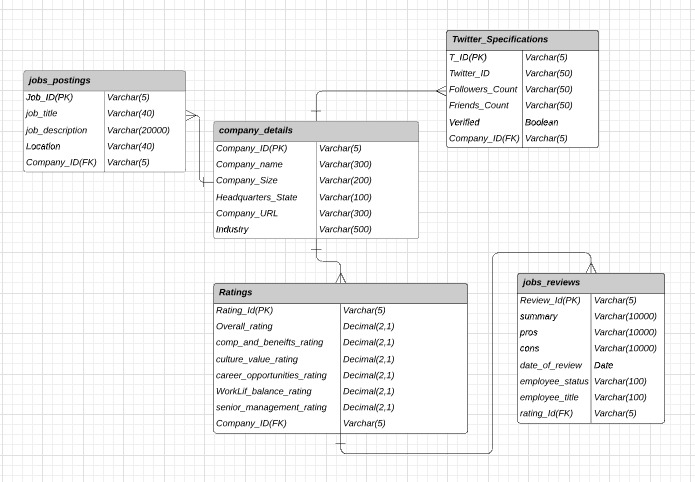

In [45]:
from IPython.display import Image
Image('D:/Northeastern University/DMDD/Project/ERD.jpeg', width = 900)

### Company Details

In [38]:
pd.read_csv("D:/Northeastern University/DMDD/Project/csv/company_details.csv")

,Company_Id,Company_name,Company_Size,Headquarters_State,Company_URL,Industry
0,C0001,Lexington Medical,1 to 50 employees,MA,http://www.lexington-med.com/,Health Care Products Manufacturing
1,C0002,Philz Coffee,1001 to 5000 employees,CA,http://www.philzcoffee.com/,Food & Beverage Stores
2,C0003,Investors Title Company,201 to 500 employees,NC,NaN,Insurance Carriers
3,C0004,Wichita Tribal Enterprises,51 to 200 employees,TX,NaN,NaN
4,C0005,ReedGroup,1001 to 5000 employees,CO,http://www.reedgroup.com/,Consulting
...,...,...,...,...,...,...
431,C0432,Northwest Pallet Services,501 to 1000 employees,IL,http://www.northwestpallet.com/,Wood Product Manufacturing
432,C0433,Ascension,10000+ employees,MO,http://jobs.ascension.org/ourwork,Health Care Services & Hospitals
433,C0434,Peterson Technology Partners,201 to 500 employees,IL,http://www.ptechpartners.com/,Computer Hardware & Software
434,C0435,Synechron,5001 to 10000 employees,NY,http://www.synechron.com/,IT Services


In [15]:
# Checking for duplicate values in Primary Key
df1 = company_details.duplicated(['Company_Id'])
df1.value_counts()

False    436
dtype: int64

In [18]:
# Testing for Null values in Primary Key
df1.isnull().sum()

0

### Job Postings

In [21]:
pd.read_csv("D:/Northeastern University/DMDD/Project/csv/job_postings.csv")

,Job_ID,job_title,job_description,Location,Company_ID
0,J0001,Supply Chain Analyst,"As a Supply Chain Analyst, you will play a key...",MA,C0001
1,J0002,Supply Chain Analyst,This role will Better the Days of both our int...,CA,C0002
2,J0003,Sr. Business Analyst,Sr. Business Analyst\nLocation\n\n\nNC - RTP (...,NC,C0003
3,J0004,Business Systems Analyst,"Wichita Tribal Enterprises, LLC. Is looking fo...",NM,C0004
4,J0005,Business Analyst II,Do you want to be a part\nof a collaborative C...,CO,C0005
...,...,...,...,...,...
431,J0432,Logistics Coordinator,"Northwest Pallet Services, LLC is one of the l...",IL,C0432
432,J0433,Sr Data Analyst,"We Are Hiring\n\nSr. Data Analyst- Nashville, ...",TN,C0433
433,J0434,Data Analyst,Job Family Summary\n\nThe Data Services team s...,FL,C0434
434,J0435,Data Analyst,"Business Consulting\nData Analyst\nTampa, FL, ...",FL,C0435


In [24]:
# Checking for duplicate values in Primary Key
df2 = job_postings.duplicated(['Job_ID'])
df2.value_counts()

False    436
dtype: int64

In [25]:
# Testing for Null values in Primary Key
df2.isnull().sum()

0

### Ratings

In [39]:
pd.read_csv("D:/Northeastern University/DMDD/Project/csv/Ratings.csv")

,Rating_Id,Overall_Rating,comp_and_benefits_rating,culture_and_values_rating,career_oppurtunities_rating,worklif_balance_rating,senior_management_rating,Company_Id
0,R0001,4.7,4.1,5.0,4.4,4.4,5.0,C0001
1,R0002,4.1,3.7,4.3,3.3,3.8,3.4,C0002
2,R0003,4.3,4.2,4.2,3.8,4.4,4.0,C0003
3,R0004,NaN,NaN,NaN,NaN,NaN,NaN,C0004
4,R0005,2.2,2.2,2.2,2.2,2.5,1.9,C0005
...,...,...,...,...,...,...,...,...
431,R0432,3.0,3.3,2.7,3.0,3.0,2.9,C0432
432,R0433,3.2,3.4,3.3,3.1,3.4,2.7,C0433
433,R0434,4.5,3.9,4.3,4.3,4.3,4.5,C0434
434,R0435,3.6,3.7,3.6,3.5,3.5,3.3,C0435


In [28]:
# Checking for duplicate values in Primary Key
df3 = Ratings.duplicated(['Rating_Id'])
df3.value_counts()

False    436
dtype: int64

In [29]:
# Testing for Null values in Primary Key
df3.isnull().sum()

0

### Twitter Specifications

In [31]:
pd.read_csv("D:/Northeastern University/DMDD/Project/csv/Twitter_Specifications.csv")

,TID,Twitter ID,Followers Count,Friends Count,Verified,Company_id
0,T0001,@InsightEnt,5686,935,True,C0214
1,T0002,@coop_finance,4003,942,False,C0302
2,T0003,@rayconglobal,2397,33,False,C0145
3,T0004,@uline,3845,3,False,C0080
4,T0005,@SuccessCharters,11231,1488,True,C0217
...,...,...,...,...,...,...
271,T0272,@TheMILCorp,109,79,False,C0169
272,T0273,@UNFI,8335,601,False,C0062
273,T0274,@CampusMgmt,952,539,False,C0078
274,T0275,@S3Inc,47,34,False,C0269


In [32]:
# Checking for duplicate values in Primary Key
df4 = Twitter_Specifications.duplicated(['TID'])
df4.value_counts()

False    276
dtype: int64

In [33]:
# Testing for Null values in Primary Key
df4.isnull().sum()

0

### Reviews

In [35]:
pd.read_csv("D:/Northeastern University/DMDD/Project/csv/jobs_reviews.csv")

,Review_Id,summary,pros,cons,Date_of_review,Employee_Status,Employee_Title,Rating_Id
0,RE001,"""Lives the Values""",Fallon Health is one of those organizations wh...,Fallon Health is an health insurer and the pre...,13-Feb-18,Current Employee,Anonymous,R0001
1,RE002,"""Great Company!""",ARA's core values are central to all of the de...,There are some employees with long held resent...,4-Sep-18,Current Employee,Anonymous,R0002
2,RE003,"""Development Coordiantor""",JDRF is a nice place to work,They have not cured diabetes yet,27-Apr-18,Current Employee,Development Coordinator,R0003
3,RE004,"""Joy in thinking, doing and growing""",Collaborative thinking is the norm Open and ho...,Firm deadlines (welcome to the real world). If...,25-Jan-18,Former Employee,Administrator,R0004
4,RE005,"""Northrop Grumman's Overview""",Honors the 9/80 (every other Friday's off) sch...,Bad managers acting out of self interest in so...,24-Aug-19,Current Employee,Scheduling Analyst,R0005
...,...,...,...,...,...,...,...,...
272,RE273,"""I enjoy working here""",Learned a lot of new skills; Employees are wil...,Onboarding process could be improved; The firs...,12-Dec-19,Current Employee,Data Analyst,R0374
273,RE274,"""Project Manager""","Great: Management, there for their employees. ...","Only one, no bonus. I know they are looking in...",13-Feb-17,Current Employee,Project Manager,R0375
274,RE275,"""Data Analyst""","People here are great, very friendly and helpf...",This company is good for those in their late 5...,11-Jul-18,Former Employee,Data Analyst,R0376
275,RE276,"""Great Place for Employment""",Lentigen is a growing company so there are lot...,There are some growing pains as the company ge...,12-Nov-18,Current Employee,Anonymous,R0377


In [36]:
# Checking for duplicate values in Primary Key
df5 = jobs_reviews.duplicated(['Review_Id'])
df5.value_counts()

False    277
dtype: int64

In [37]:
# Testing for Null values in Primary Key
df5.isnull().sum()

0

## USE-CASES for the created structured database

### USE CASE 1:

Querying the top 10 Popular Companies

 SELECT c.company_name, t.followers_count
 <br>
 FROM twitter_specifications t
 <br>
 LEFT JOIN company_details c
 <br>
 ON t.company_id = c.company_id
 <br>
 ORDER BY t.followers_count DESC
 <br>
 LIMIT 10;

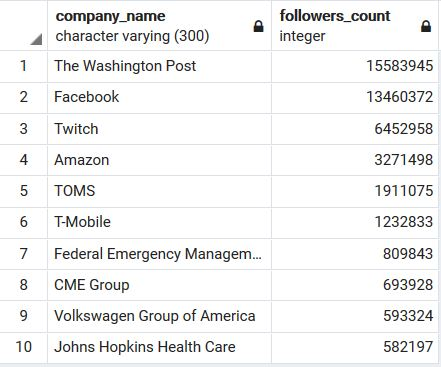

In [52]:
Image('D:/Northeastern University/DMDD/Project/usecase1.jpg', width = 350)

### USE CASE 2:

Querying for top 50 companies having best overall ratings

SELECT c.company_name, r.overall_rating
<br>
FROM company_details c
<br>
LEFT JOIN ratings r
<br>
ON c.company_id = r.company_id
<br>
WHERE r.overall_rating IS NOT NULL
<br>
ORDER BY r.overall_rating DESC
<br>
LIMIT 50;

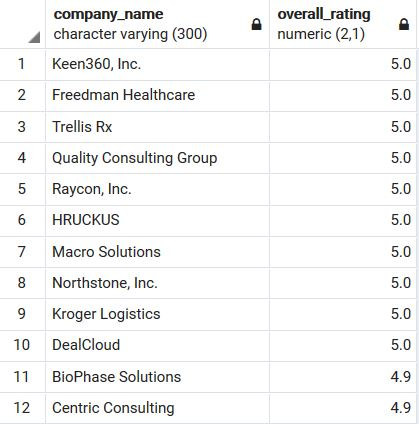

In [59]:
Image('D:/Northeastern University/DMDD/Project/usecase2.jpg', width = 350)

### USE CASE 3:

Finding the companies which has good reviews

SELECT c.company_name, re.summary
<br>
FROM ratings r
<br>
LEFT JOIN company_details c ON r.company_id = c.company_id 
<br>
LEFT JOIN Jobs_review re ON r.rating_id = re.rating_id
<br>
WHERE re.summary LIKE '%good%'
<br>
OR re.summary LIKE '%best%'	
<br>
OR re.summary LIKE '%healthy%'
<br>
OR re.summary LIKE '%great%'
<br>
OR re.summary LIKE '%joy%'
<br>
OR re.summary LIKE '%supportive%'	

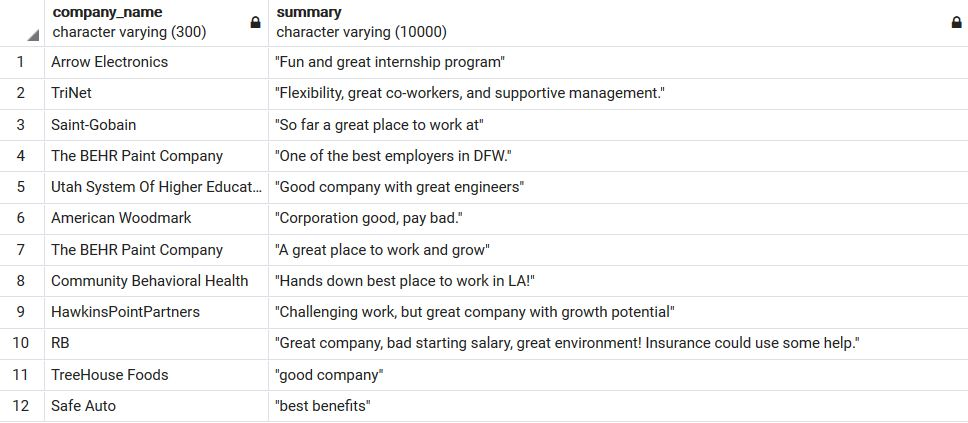

In [58]:
Image('D:/Northeastern University/DMDD/Project/usecase3.jpg', width = 700)

### USE CASE 4:

Finding the companies having overall rating greater than 4 ordered by their popularity

SELECT c.company_name, t.followers_count, r.overall_rating
<br>
FROM company_details c
<br>
LEFT JOIN ratings r ON r.company_id = c.company_id 
<br>
LEFT JOIN twitter_specifications t ON t.company_id = c.company_id
<br>
WHERE t.followers_count IS NOT NULL AND r.overall_rating > 4
<br>
ORDER BY t.followers_count DESC

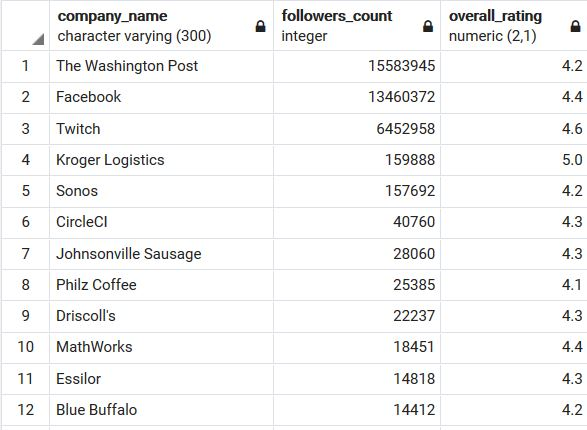

In [61]:
Image('D:/Northeastern University/DMDD/Project/usecase4.jpg', width = 400)

### USE CASE 5:

Finding the companies and their respective job title that has cultural values rating greater than 3.5 and worklife balace rating greater than 4

SELECT company_name, job_title
<br>
FROM job_postings j
<br>
LEFT JOIN ratings r ON j.company_id = r.company_id 
<br>
LEFT JOIN company_details c on j.company_id = c.company_id
<br>
WHERE culture_values_rating > 3.5 AND worklif_balance_rating > 4

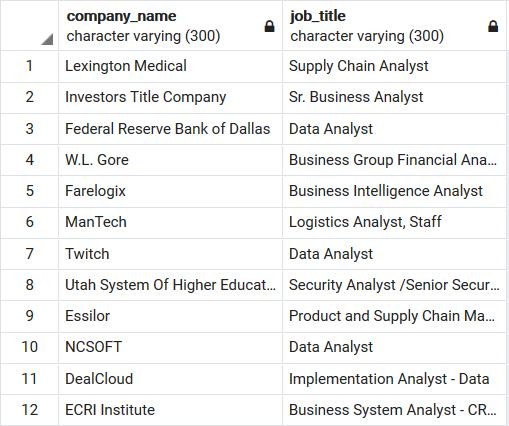

In [62]:
Image('D:/Northeastern University/DMDD/Project/usecase5.jpg', width = 450)

### USE CASE 6:

Querying for companies and respective job title that has no negative reviews

SELECT company_name, employee_title, cons
<br>
FROM ratings r
<br>
FULL OUTER JOIN jobs_review j ON j.rating_id = r.rating_id
<br>
FULL OUTER JOIN company_details c on c.company_id = r.company_id
<br>
WHERE cons IS NULL AND employee_title IS NOT NULL;
<br>

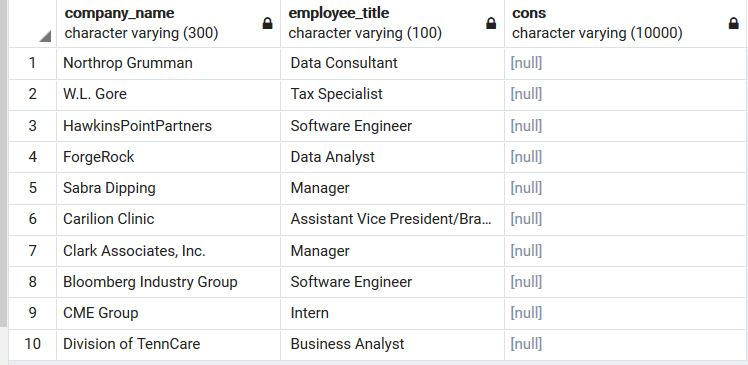

In [65]:
Image('D:/Northeastern University/DMDD/Project/usecase6.jpg', width = 600)

### REPORT
#### Libraries used:
selenium  

NoSuchElementException 

ElementClickInterceptedException 

StaleElementReferenceException

webdriver

time

csv

pandas 

#### Data scraped from
URL : "https://www.glassdoor.com/Job/us-supply-chain-analyst-jobs-SRCH_IL.0,2_IN1_KO3,23_IP"+ str(i) +".htm"

URL : "https://www.glassdoor.com/Job/us-data-analyst-jobs-SRCH_IL.0,2_IN1_KO3,15_IP"+ str(i) +".htm"

URL : "https://www.glassdoor.com/Job/us-business-analyst-jobs-SRCH_IL.0,2_IN1_KO3,19_IP"+ str(i) +".htm"

#### Used "for loop" for toggling to the first 5 pages of the glassdoor specific page
for i in range(1,7):

#### Follwing code is used to call a webdriver for the respective browser, for instance, this project is using Firefox
driver = webdriver.Firefox()

#### Following code in the try block helps us click anywhere on the page so as to make the login pop-up appear
 try:
        driver.find_element_by_class_name("selected").click()
    except ElementClickInterceptedException:
        pass

    time.sleep(3)
    
#### Using the follwoing xpath to automate the login whenever the page asks for it
    try:
        driver.find_element_by_xpath('.//span[@class="SVGInline modal_closeIcon"]').click()
    except NoSuchElementException:
        pass

    job_buttons = driver.find_elements_by_class_name("jl")
#### Toggleing through each job posting one after the other to fetch the required details
    for i in job_buttons:
        i.click()
        
        try:
            company_name = driver.find_element_by_xpath('.//div[@class="employerName"]').text
        except StaleElementReferenceException:
            company_name = driver.find_element_by_xpath('.//div[@class="employerName"]').text
        except NoSuchElementException:
            company_name = -1
        time.sleep(0.5)
        try:    
            location = driver.find_element_by_xpath('.//div[@class="location"]').text
        except StaleElementReferenceException:
            location = driver.find_element_by_xpath('.//div[@class="location"]').text
        except NoSuchElementException:
            location = -1
        time.sleep(0.5)   
        try:    
            job_title = driver.find_element_by_xpath('.//div[contains(@class, "title")]').text
        except StaleElementReferenceException:
            job_title = driver.find_element_by_xpath('.//div[contains(@class, "title")]').text
        except NoSuchElementException:
            job_title = -1
        time.sleep(0.5)
        try:
            job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
        except StaleElementReferenceException:
            job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
        except NoSuchElementException:
            job_description = -1
        time.sleep(0.5)         
                
        try:
            ratings = driver.find_element_by_xpath('.//div[@class = "employerName"]/span[@class="rating"]').text
        except NoSuchElementException:
            ratings = -1
        except StaleElementReferenceException:
            ratings = driver.find_element_by_xpath('.//div[@class = "employerName"]/span[@class="rating"]').text
        time.sleep(1)  
        try:
            driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="overview"]').click()
            time.sleep(0.5)
            try:
                headquarters = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Headquarters"]//following-sibling::*').text
            except NoSuchElementException:
                headquarters = -1
            time.sleep(0.5)
            try:
                size = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Size"]//following-sibling::*').text
            except NoSuchElementException:
                size = -1
            time.sleep(0.5)
            try:
                type_of_ownership = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Type"]//following-sibling::*').text
            except NoSuchElementException:
                type_of_ownership = -1
            time.sleep(0.5)
            try:
                industry = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Industry"]//following-sibling::*').text
            except NoSuchElementException:
                industry = -1
            time.sleep(0.5)
            try:
                company = driver.find_element_by_xpath('.//div[@class="noMarg padTopSm padBot"]/span[@class="value website"]/a')
                company_url = company.get_attribute('href')
            except NoSuchElementException:
                company_url = -1
            except StaleElementReferenceException:
                company = driver.find_element_by_xpath('.//div[@class="noMarg padTopSm padBot"]/span[@class="value website"]/a')
                company_url = company.get_attribute('href')
                
                
        except NoSuchElementException:
            headquarters = -1
            size = -1
            type_of_ownership = -1
            industry = -1
            competitors = -1
            company_url = -1
        except ElementClickInterceptedException:
            pass
        
        time.sleep(0.5)
        #Toggeling to the Ratings table of the particular job and scrapping the details
        try:
            driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="rating"]').click()
            time.sleep(1)
            
            try:
                comp_benefits = driver.find_element_by_xpath('//*[@id="RatingsTrends"]/div[1]/ul/li[1]/span[2]/span').text
            except NoSuchElementException:
                comp_benefits = -1
            time.sleep(0.5)
            
            
            try:
                culture_values = driver.find_element_by_xpath('//*[@id="RatingsTrends"]/div[1]/ul/li[2]/span[2]/span').text
            except NoSuchElementException:
                culture_values = -1
            time.sleep(0.5)
            
            
            try:
                career_opp = driver.find_element_by_xpath('//*[@id="RatingsTrends"]/div[1]/ul/li[3]/span[2]/span').text
            except NoSuchElementException:
                career_opp = -1
            time.sleep(0.5)
            
            
            try:
                worklife_balance = driver.find_element_by_xpath('//*[@id="RatingsTrends"]/div[1]/ul/li[4]/span[2]/span').text
            except NoSuchElementException:
                worklife_balance = -1
            time.sleep(0.5)
            
            try:
                senior_management = driver.find_element_by_xpath('//*[@id="RatingsTrends"]/div[1]/ul/li[5]/span[2]/span').text
            except NoSuchElementException:
                senior_management = -1
            time.sleep(0.5)
        
        except NoSuchElementException:
            overall = -1
            comp_benefits = -1
            culture_values = -1
            career_opp = -1
            worklife_balance = -1
            senior_management = -1
#### Below is the script to toggle to the reviews tab of the particular job and scrapping the data    
        try:
            driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="reviews"]').click()
            time.sleep(1)

            reviews = driver.find_elements_by_xpath('.//div[@class="reviews-feed-ajax"]/ol')
            #print(reviews)
            #print()
            time.sleep(3)
            for j in reviews:
                try:
                    summary = driver.find_element_by_xpath('.//div[@class="companyTitle"]/h2/span').text
                    reviewer_status = driver.find_element_by_xpath('.//div[@class="reviewerStatus"]').text
                    pros = driver.find_element_by_xpath('.//div[@class="cell top"]/p[@class=" pros mainText"]').text
                    cons = driver.find_element_by_xpath('.//div[@class="cell top"]/p[@class=" cons mainText"]').text
                    Date = driver.find_element_by_xpath('.//div[@class="dateTime"]/time').text
                    
                except NoSuchElementException:
                    summary = -1
                    company_name = -1
                    job_title = -1
                    reviewer_status = -1
                    pros = -1
                    cons = -1
                    Date = -1
                    
            
        jobs.append({"Job Title" : job_title,
                "Job Description" : job_description,
                "Rating" : ratings,
                "Company Name" : company_name,
                "Location" : location,
                "Headquarters" : headquarters,
                "Size" : size,
                "Type of ownership" : type_of_ownership,
                "Company URL" : company_url,
                "Industry" : industry,
                "Comp & benefits Rating" : comp_benefits,
                "Culture & values Rating" : culture_values,
                "Career opportunities Rating" : career_opp,
                "Work/Life balance Rating" : worklife_balance,
                "Senior Management Rating" : senior_management,
                "Summary" : summary,
                "Reviewer Status" : reviewer_status,
                "Pros" : pros,
                "Cons" : cons,
                "Date" : Date,})

#### applying "for loop" on every company's twitter ID  from each job domains
for i in range(len(supply_chain_analyst)):
    
    try:
        
        company_name.append(twitter_api.statuses.user_timeline(screen_name=business_analyst[i])[1]['user']['name'])
        followers.append(twitter_api.statuses.user_timeline(screen_name=business_analyst[i])[1]['user']['followers_count'])
        friends.append(twitter_api.statuses.user_timeline(screen_name=business_analyst[i])[1]['user']['friends_count'])
        verify.append(twitter_api.statuses.user_timeline(screen_name=business_analyst[i])[1]['user']['verified'])
        twitter_id.append(business_analyst[i])
    except IndexError as error:

## CONCLUSION   

Our primary focus of this project was to build a structured database for the selected job domains and its social media activities. We have successfully built the database using PostgreSQL and normalized tables without any redundancy.

## CITATIONS/REFERENCES

https://stackoverflow.com/

https://www.w3schools.com/sql

https://www.lucidchart.com

https://github.com/arapfaik/scraping-glassdoor-selenium/blob/master/glassdoor%20scraping.ipynb

## LICENSE

This is a human-readable summary of (and not a substitute for) the license. Disclaimer. 

You are free to: 

Share — copy and redistribute the material in any medium or format 
Adapt — remix, transform, and build upon the material for any purpose, even commercially. 
The licensor cannot revoke these freedoms if you follow the license terms. 


Under the following terms:

Attribution — You must give appropriate credit, provide a link to the license, and indicate if changes were made. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use. 

No additional restrictions — You may not apply legal terms or technological measures that legally restrict others from doing anything the license permits. 

Notices:

You do not have to comply with the license for elements of the material in the public domain or where your use is permitted by an applicable exception or limitation. 

No warranties are given. The license may not give you all the permissions necessary for your intended use. For example, other rights such as publicity, privacy, or moral rights may limit how you use the material.


In [ ]:
GitHub Link : https://github.com/Rohit-Chandramouli/Data-Management-and-Database-Design-Project